In [88]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# load data
data = pd.read_excel('ENB2012_data.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [113]:
# check for null values
data.isnull().any()

Relative_Compactness         False
Surface_Area                 False
Wall_Area                    False
Roof_Area                    False
Overall_Height               False
Orientation                  False
Glazing_Area                 False
Glazing_Area_Distribution    False
Heating_Load                 False
Cooling_Load                 False
dtype: bool

In [91]:
# rename columns
col_names = {'X1': 'Relative_Compactness', 
             'X2': 'Surface_Area',
             'X3': 'Wall_Area',
             'X4': 'Roof_Area',
             'X5': 'Overall_Height',
             'X6': 'Orientation',
             'X7': 'Glazing_Area',
             'X8': 'Glazing_Area_Distribution',
             'Y1': 'Heating_Load',
             'Y2': 'Cooling_Load'}

data = data.rename(columns=col_names)
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [114]:
data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


# Just learnt:
A simple way to create a table of choice variables e.g. 2 

data[['variable_1', 'variable_2']]

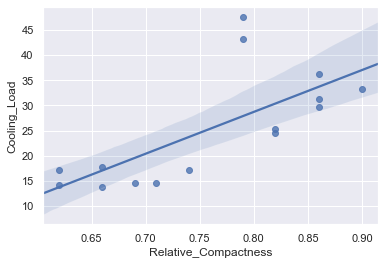

In [92]:
# selecting a sample of the dataset
sample_data = data[['Relative_Compactness', 'Cooling_Load']].sample(n=15, random_state=2)

# regression plot
sns.regplot(x='Relative_Compactness', y='Cooling_Load', data=sample_data)

In [93]:
# Normalizing the dataset

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
features_data = normalized_data.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalized_data['Heating_Load']

In [94]:
features_data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0


In [95]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_data, heating_target, test_size=0.3, random_state=1)

In [96]:
# fit model to dataset
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
# predictions
prediction = model.predict(X_test)

In [98]:
# model evaluation
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# MAE score
mae = mean_absolute_error(y_test, prediction)
print('MAE score is: {}'.format(round(mae, 3)))

# R2 score
r2 = r2_score(y_test, prediction)
print('r2 score is: {}'.format(round(r2, 3)))

# RMSE score
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print('RMSE score is: {}'.format(round(rmse, 3)))

# RSS score
rss = sum((y_test - prediction)**2)
print('RSS score is: {}'.format(round(rss, 3)))

MAE score is: 0.063
r2 score is: 0.893
RMSE score is: 0.089
RSS score is: 1.825


In [99]:
# Grid search

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lasso_params = {'alpha': [i for i in np.arange(0.001,0.015,0.0005)]}
ridge_params = {'alpha': [i for i in np.arange(0.1, 0.6,0.05)]}

lasso_search = GridSearchCV(estimator=Lasso(), param_grid=lasso_params, cv=5)
ridge_search = GridSearchCV(estimator=Ridge(), param_grid=ridge_params, cv=5)

lasso_search.fit(X_train, y_train)
ridge_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.15000000000000002,
                                   0.20000000000000004, 0.25000000000000006,
                                   0.30000000000000004, 0.3500000000000001,
                                   0.40000000000000013, 0.45000000000000007,
                                   0.5000000000000001, 0.5500000000000002]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [100]:
print(lasso_search.best_params_)
print(ridge_search.best_params_)

{'alpha': 0.001}
{'alpha': 0.1}


In [101]:
# Ridge regression


ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [102]:
# The Lasso


lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [103]:
# Elastic Net regression

from sklearn.linear_model import ElasticNet
elasti_reg = ElasticNet(alpha=0.001)
elasti_reg.fit(X_train, y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
# comparing the effects of regularization

def get_weights_df(model, features, col_name):
    '''this function returns the weight of every feature'''
    
    weights = pd.Series(model.coef_, features.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    
    return weights_df

In [105]:
# Linear model weights
linear_model_weights = get_weights_df(model, X_train, 'Linear_Model_weight')

# weights from ridge regression
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')

# weights from the lasso
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

# weights from Elastic Net regression
elasticNet_weights_df = get_weights_df(elasti_reg, X_train, 'Elastic_Net_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights = pd.merge(final_weights, elasticNet_weights_df, on='Features')

In [106]:
final_weights

,Features,Linear_Model_weight,Ridge_Weight,Lasso_weight,Elastic_Net_weight
0,Surface_Area,-5.620066e+12,-0.160632,0.000000,0.000000
1,Relative_Compactness,-5.855289e-01,-0.472633,-0.027719,-0.069218
2,Orientation,3.376007e-03,0.003376,0.000000,0.000000
3,Glazing_Area_Distribution,2.662706e-02,0.028529,0.021431,0.024931
4,Glazing_Area,2.148657e-01,0.214346,0.206132,0.208971
5,Overall_Height,3.945312e-01,0.419646,0.463482,0.487470
6,Wall_Area,3.278372e+12,0.052575,0.200087,0.183070
7,Roof_Area,4.215050e+12,-0.255068,-0.000000,-0.000000


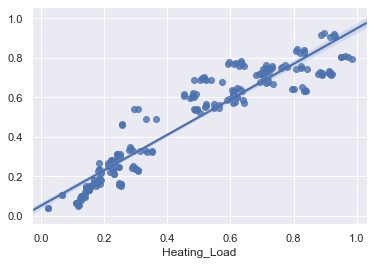

In [146]:
sns.set(color_codes=True)
sns.regplot(x=y_test, y=prediction, label='regression plot')

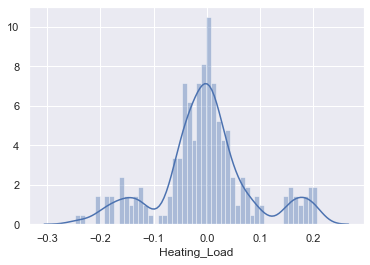

In [107]:
sns.distplot((y_test-prediction), bins=50)